In [743]:
# Data Science Parichay provided tutorial with some tweaking on usage for counter trafficking use https://datascienceparichay.com/article/python-get-data-from-twitter-api-v2/import pandas as pd
# this program built while watching an incredible tutorial provided by The AI & DS Channel on Youtube found at https://www.youtube.com/watch?v=ng6L_wvREB4

import tweepy
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# your bearer token for tweepy
MY_BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAACzFgwEAAAAAv1E5IYl8dHPC1%2FIf73Hi6eU1nBg%3DhpGUB47REgYyLIRN69QBfsAz6XsoJyV8FFf2qmVSqd80PTD6qX"
# create your client 
client = tweepy.Client(bearer_token=MY_BEARER_TOKEN)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CHRKEMP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CHRKEMP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [744]:
# query to search for tweets
query = "#slavaukraine lang:en -is:retweet"
# your start and end time for fetching tweets
start_time = "2022-10-12T00:00:00Z"
end_time = "2022-10-18T00:00:00Z"
# get tweets from the API
tweets = client.search_recent_tweets(query=query,
                                     start_time=start_time,
                                     end_time=end_time,
                                     tweet_fields = ["created_at", "text", "source"],
                                     user_fields = ["name", "username", "location", "verified", "description"],
                                     max_results = 75,
                                     expansions='author_id'
                                     )

In [745]:
# tweet specific info
print(len(tweets.data))
# user specific info
print(len(tweets.includes["users"]))

75
48


In [746]:
# first tweet
first_tweet = tweets.data[0]
dict(first_tweet)

{'id': 1582159087944404995,
 'source': 'Twitter for Android',
 'author_id': 1546996310473162753,
 'created_at': datetime.datetime(2022, 10, 17, 23, 58, 16, tzinfo=datetime.timezone.utc),
 'text': '@Kusuwa @Ukraine @BandaAgency All we need is your prayers and support thank you\n#SlavaUkraine💛💙💪',
 'edit_history_tweet_ids': ['1582159087944404995']}

In [747]:
# user information for the first tweet
first_tweet_user = tweets.includes["users"][0]
dict(first_tweet_user)

{'id': 1546996310473162753,
 'verified': False,
 'location': 'Ukraine',
 'description': 'soldier 💪🇺🇦 we fight for freedom and also our right, I will give the only life I have for my country..\nUKRAINE 🇺🇦🇺🇦',
 'username': 'anton_568',
 'name': 'Marko Васильчук'}

In [748]:
# import the pandas library
import pandas as pd
# create a list of records
tweet_info_ls = []
# iterate over each tweet and corresponding user details
for tweet, user in zip(tweets.data, tweets.includes['users']):
    tweet_info = {
        'created_at': tweet.created_at,
        'text': tweet.text,
        'source': tweet.source,
        'name': user.name,
        'username': user.username,
        'location': user.location,
        'verified': user.verified,
        'description': user.description
    }
    tweet_info_ls.append(tweet_info)
# create dataframe from the extracted records
tweets_df = pd.DataFrame(tweet_info_ls)
# display the dataframe
tweets_df.head()

,created_at,text,source,name,username,location,verified,description
0,2022-10-17 23:58:16+00:00,@Kusuwa @Ukraine @BandaAgency All we need is y...,Twitter for Android,Marko Васильчук,anton_568,Ukraine,False,soldier 💪🇺🇦 we fight for freedom and also our ...
1,2022-10-17 23:54:58+00:00,@AlicjaWinnicki @SecBlinken Thank you for your...,Twitter for Android,(((Roop))) 🇺🇦🌻,realroopie,"Vancouver, BC, Canada",False,"“Leave the world better that you were in it, t..."
2,2022-10-17 23:11:23+00:00,@TheHillTimes Dumbest headline ever. If Putin ...,Twitter for iPhone,Angie,Angela_Twenty2,None,False,"Angie; Vaccinated Single Mom, She/Her, BLM, UT..."
3,2022-10-17 22:29:36+00:00,Omg!!! I’m so happy!!! I will never ever forge...,Twitter for iPhone,✌🇺🇲LemStraw🇺🇲 💙✌#IStandWithUkraine🇺🇦,LemStraw,None,False,Each of us can make a difference. You too can ...
4,2022-10-17 22:28:04+00:00,"@ukrainiansquad ""Russia is a terrorist state""\...",Twitter for Android,Julia,Judipopsicle,🧡 in Yosemite,False,"Crypto investor, swing trader, non-pract lawye..."


In [749]:
#export dataframe to csv file please be sure to use a file directory and title the csv file appropriately before running
tweets_df.to_csv(r'C:\Users\CHRKEMP\AppData\Local\Programs\Microsoft VS Code\Visual Code\Twitter\ukraine3.csv')

In [750]:
# this program built while watching an incredible tutorial provided by The AI & DS Channel on Youtube found at https://www.youtube.com/watch?v=ng6L_wvREB4
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CHRKEMP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CHRKEMP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [751]:
# import csv file from your computer into the prgram for analysis
df = pd.read_csv(r'C:\Users\CHRKEMP\AppData\Local\Programs\Microsoft VS Code\Visual Code\Twitter\ukraine3.csv')

In [752]:
#display the data in its entirety
df.head()

,Unnamed: 0,created_at,text,source,name,username,location,verified,description
0,0,2022-10-17 23:58:16+00:00,@Kusuwa @Ukraine @BandaAgency All we need is y...,Twitter for Android,Marko Васильчук,anton_568,Ukraine,False,soldier 💪🇺🇦 we fight for freedom and also our ...
1,1,2022-10-17 23:54:58+00:00,@AlicjaWinnicki @SecBlinken Thank you for your...,Twitter for Android,(((Roop))) 🇺🇦🌻,realroopie,"Vancouver, BC, Canada",False,"“Leave the world better that you were in it, t..."
2,2,2022-10-17 23:11:23+00:00,@TheHillTimes Dumbest headline ever. If Putin ...,Twitter for iPhone,Angie,Angela_Twenty2,NaN,False,"Angie; Vaccinated Single Mom, She/Her, BLM, UT..."
3,3,2022-10-17 22:29:36+00:00,Omg!!! I’m so happy!!! I will never ever forge...,Twitter for iPhone,✌🇺🇲LemStraw🇺🇲 💙✌#IStandWithUkraine🇺🇦,LemStraw,NaN,False,Each of us can make a difference. You too can ...
4,4,2022-10-17 22:28:04+00:00,"@ukrainiansquad ""Russia is a terrorist state""\...",Twitter for Android,Julia,Judipopsicle,🧡 in Yosemite,False,"Crypto investor, swing trader, non-pract lawye..."


In [753]:
#display the information about the data in its current form
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   48 non-null     int64 
 1   created_at   48 non-null     object
 2   text         48 non-null     object
 3   source       48 non-null     object
 4   name         48 non-null     object
 5   username     48 non-null     object
 6   location     28 non-null     object
 7   verified     48 non-null     bool  
 8   description  43 non-null     object
dtypes: bool(1), int64(1), object(7)
memory usage: 3.2+ KB


In [754]:
# display null fields of the data csv
df.isnull().sum()

Unnamed: 0      0
created_at      0
text            0
source          0
name            0
username        0
location       20
verified        0
description     5
dtype: int64

In [755]:
#display the column titles 
df.columns

Index(['Unnamed: 0', 'created_at', 'text', 'source', 'name', 'username',
       'location', 'verified', 'description'],
      dtype='object')

In [756]:
#drop irrelevent columns from the data
text_df = df.drop(['Unnamed: 0', 'created_at', 'source', 'name', 'username',
       'location', 'verified', 'description'], axis=1)
text_df.head()

,text
0,@Kusuwa @Ukraine @BandaAgency All we need is y...
1,@AlicjaWinnicki @SecBlinken Thank you for your...
2,@TheHillTimes Dumbest headline ever. If Putin ...
3,Omg!!! I’m so happy!!! I will never ever forge...
4,"@ukrainiansquad ""Russia is a terrorist state""\..."


In [757]:
#display the text only outside column format
print(text_df['text'].iloc[0],'\"')
print(text_df['text'].iloc[1],'\"')
print(text_df['text'].iloc[2],'\"')
print(text_df['text'].iloc[3],'\"')
print(text_df['text'].iloc[4],'\"')

@Kusuwa @Ukraine @BandaAgency All we need is your prayers and support thank you
#SlavaUkraine💛💙💪 "
@AlicjaWinnicki @SecBlinken Thank you for your support and prayers 💛💙✊
#SlavaUkraine "
@TheHillTimes Dumbest headline ever. If Putin wins there is nothing less than Cold War, with every despotic ruler clamoring for a nuke &amp; then pushing their whims on the West. New Feudalism anyone? #SlavaUkraine "
Omg!!! I’m so happy!!! I will never ever forget that sweet angel’s face. I wish the VERY BEST FOR BOTH OF THEM! #SlavaUkraine FOREVER https://t.co/UVvGSmA2Ih "
@ukrainiansquad "Russia is a terrorist state"
#StandWithUkraine #SlavaUkraine "


In [758]:
#display the data that is remaining after dropping columns
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    48 non-null     object
dtypes: object(1)
memory usage: 512.0+ bytes


In [762]:
# remove the extra items from the data
def data_processing(text):
    text = text.lower()
    text == re.sub(r"https/S+|www/S+https/S+", '',text, flags=re.MULTILINE)
    text == re.sub(r'\@w+|\#','',text)
    text == re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [763]:
#call Function to remove the extra data
text_df.text = text_df['text'].apply(data_processing)

In [764]:
#Remove duplicate items in the data
text_df = text_df.drop_duplicates('text')

In [765]:
# define data stemmer
stemmer = PorterStemmer()
def stemming(data):
    text =[stemmer.stem(word) for word in data]
    return data

In [766]:
#function to call Data stemmer
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [767]:
#display data after preprocessing data
text_df.head()

,text
0,@ kusuwa @ ukraine @ bandaagency need prayers ...
1,@ alicjawinnicki @ secblinken thank support pr...
2,@ thehilltimes dumbest headline ever . putin w...
3,omg ! ! ! ’ happy ! ! ! never ever forget swee...
4,@ ukrainiansquad `` russia terrorist state '' ...


In [768]:
#dislplay only the text remaining
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

@ kusuwa @ ukraine @ bandaagency need prayers support thank # slavaukraine💛💙💪 

@ alicjawinnicki @ secblinken thank support prayers 💛💙✊ # slavaukraine 

@ thehilltimes dumbest headline ever . putin wins nothing less cold war , every despotic ruler clamoring nuke & amp ; pushing whims west . new feudalism anyone ? # slavaukraine 

omg ! ! ! ’ happy ! ! ! never ever forget sweet angel ’ face . wish best ! # slavaukraine forever https : //t.co/uvvgsma2ih 

@ ukrainiansquad `` russia terrorist state '' # standwithukraine # slavaukraine 



In [769]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    48 non-null     object
dtypes: object(1)
memory usage: 768.0+ bytes


In [770]:
#define polarity from TextBlob libary
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [771]:
#call the function polarity from TextBlob
text_df['polarity'] = text_df['text'].apply(polarity)

In [772]:
#display the data after processing polarity
text_df.head(10)

,text,polarity
0,@ kusuwa @ ukraine @ bandaagency need prayers ...,0.000000
1,@ alicjawinnicki @ secblinken thank support pr...,0.000000
2,@ thehilltimes dumbest headline ever . putin w...,-0.082576
3,omg ! ! ! ’ happy ! ! ! never ever forget swee...,0.783333
4,@ ukrainiansquad `` russia terrorist state '' ...,0.000000
5,@ ukrainiansquad absolute heroes - good luck &...,0.466667
6,@ iaponomarenko @ kathid_d crazy # fn # russia...,-0.100000
7,@ iaponomarenko # slavaukraine # putinwarcrimi...,0.625000
8,anyone charge @ whitehouse # turkey even # isr...,0.000000
9,@ ukrarmyblog may divinely protected ! # slava...,0.000000


In [773]:
#define labels for the processed data for sentiment
def sentiment(label):
    if label<0:
        return"negative"    
    elif label==0:
        return"Neutral"
    elif label>0:
        return"positive"

In [774]:
#call function to display polarity and sentiment
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [775]:
#display the processed data with polarity and sentiment
text_df.head(20)

,text,polarity,sentiment
0,@ kusuwa @ ukraine @ bandaagency need prayers ...,0.000000,Neutral
1,@ alicjawinnicki @ secblinken thank support pr...,0.000000,Neutral
2,@ thehilltimes dumbest headline ever . putin w...,-0.082576,negative
3,omg ! ! ! ’ happy ! ! ! never ever forget swee...,0.783333,positive
4,@ ukrainiansquad `` russia terrorist state '' ...,0.000000,Neutral
5,@ ukrainiansquad absolute heroes - good luck &...,0.466667,positive
6,@ iaponomarenko @ kathid_d crazy # fn # russia...,-0.100000,negative
7,@ iaponomarenko # slavaukraine # putinwarcrimi...,0.625000,positive
8,anyone charge @ whitehouse # turkey even # isr...,0.000000,Neutral
9,@ ukrarmyblog may divinely protected ! # slava...,0.000000,Neutral


In [811]:
#save results of TextBlob analysis
tweets_df.to_csv(r'C:\Users\CHRKEMP\AppData\Local\Programs\Microsoft VS Code\Visual Code\Twitter\ukraine3A1.csv')

<AxesSubplot: xlabel='sentiment', ylabel='count'>

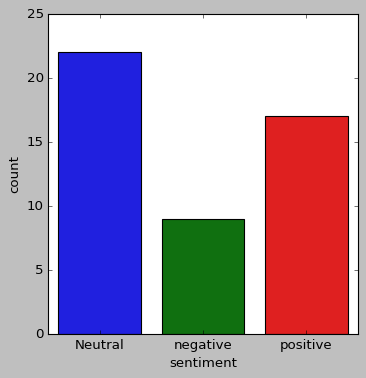

In [812]:
#display bar graph TextBlob Sentiment Analysis 
fig = plt.figure(figsize =(5,5))
sns.countplot(x ='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

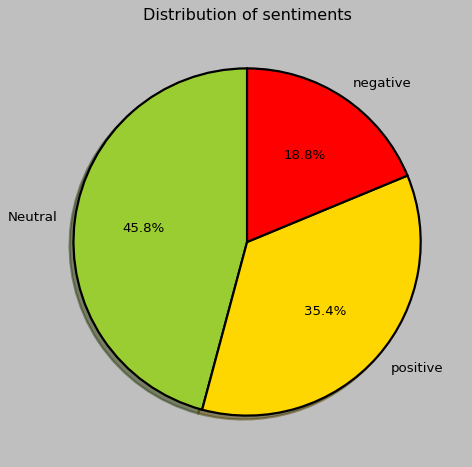

In [813]:
fig = plt.figure(figsize =(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor': "black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%',shadow=True, colors = colors, startangle=90, wedgeprops = wp,  label='')
plt.title('Distribution of sentiments')

In [776]:
#define Vader Sentiment Sentiment Intensity Analyzer
# of the sentence.
def sentiment_scores(text):
# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
# polarity_scores method of SentimentIntensityAnalyzer
# oject gives a sentiment dictionary.
# which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(text)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Sentence Overall Rated As", end = " ")
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
    else :
        print("Neutral")

In [777]:
#call function Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()
text_df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['text']]
text_df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['text']]
text_df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['text']]
text_df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['text']]

In [778]:
#display results of Sentiment Intensity Analyzer
text_df.head(20)

,text,polarity,sentiment,compound,neg,neu,pos
0,@ kusuwa @ ukraine @ bandaagency need prayers ...,0.000000,Neutral,0.9274,0.000,0.541,0.459
1,@ alicjawinnicki @ secblinken thank support pr...,0.000000,Neutral,0.9274,0.000,0.469,0.531
2,@ thehilltimes dumbest headline ever . putin w...,-0.082576,negative,-0.6293,0.208,0.705,0.087
3,omg ! ! ! ’ happy ! ! ! never ever forget swee...,0.783333,positive,0.9649,0.000,0.510,0.490
4,@ ukrainiansquad `` russia terrorist state '' ...,0.000000,Neutral,-0.6908,0.402,0.598,0.000
5,@ ukrainiansquad absolute heroes - good luck &...,0.466667,positive,0.9022,0.000,0.452,0.548
6,@ iaponomarenko @ kathid_d crazy # fn # russia...,-0.100000,negative,-0.8807,0.238,0.658,0.104
7,@ iaponomarenko # slavaukraine # putinwarcrimi...,0.625000,positive,0.5093,0.000,0.708,0.292
8,anyone charge @ whitehouse # turkey even # isr...,0.000000,Neutral,-0.8439,0.269,0.731,0.000
9,@ ukrarmyblog may divinely protected ! # slava...,0.000000,Neutral,0.9476,0.000,0.415,0.585


In [780]:
#save results of Intensity analyzer
tweets_df.to_csv(r'C:\Users\CHRKEMP\AppData\Local\Programs\Microsoft VS Code\Visual Code\Twitter\ukraine3A.csv')

<AxesSubplot: xlabel='sentiment', ylabel='count'>

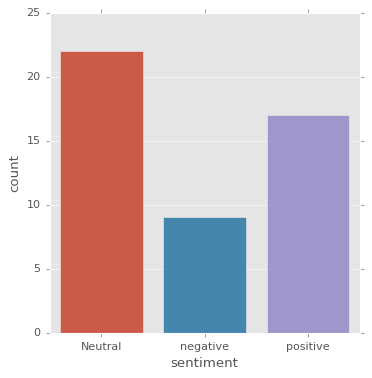

In [781]:
#display results in Bar Graph Vader Sentiment Intensity Analyzer
fig = plt.figure(figsize =(5,5))
sns.countplot(x ='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

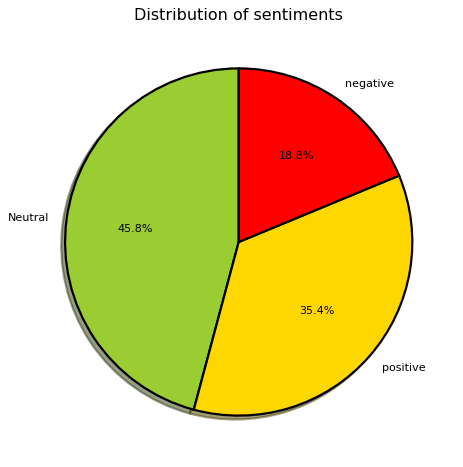

In [782]:
#display results Vader Sentiment Analyzer in pie graph
fig = plt.figure(figsize =(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor': "black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%',shadow=True, colors = colors, startangle=90, wedgeprops = wp,  label='')
plt.title('Distribution of sentiments')

In [783]:
#sift out positive sentiment from data pull
pos_tweets = text_df[text_df.sentiment == 'positive']
pos_tweets = neg_tweets.sort_values(['polarity'], ascending = False)
pos_tweets.head()

,text,polarity,sentiment,compound,neg,neu,pos
38,bouncing britney spears celebrity fake interra...,-0.1,negative,-0.2960,0.237,0.573,0.191
34,monday vibes ! ! ! # silly # curvy # smile # t...,-0.1,negative,0.5386,0.000,0.528,0.472
15,’ watch horror movies ’ even watch popular/hyp...,-0.2,negative,-0.6555,0.206,0.683,0.110


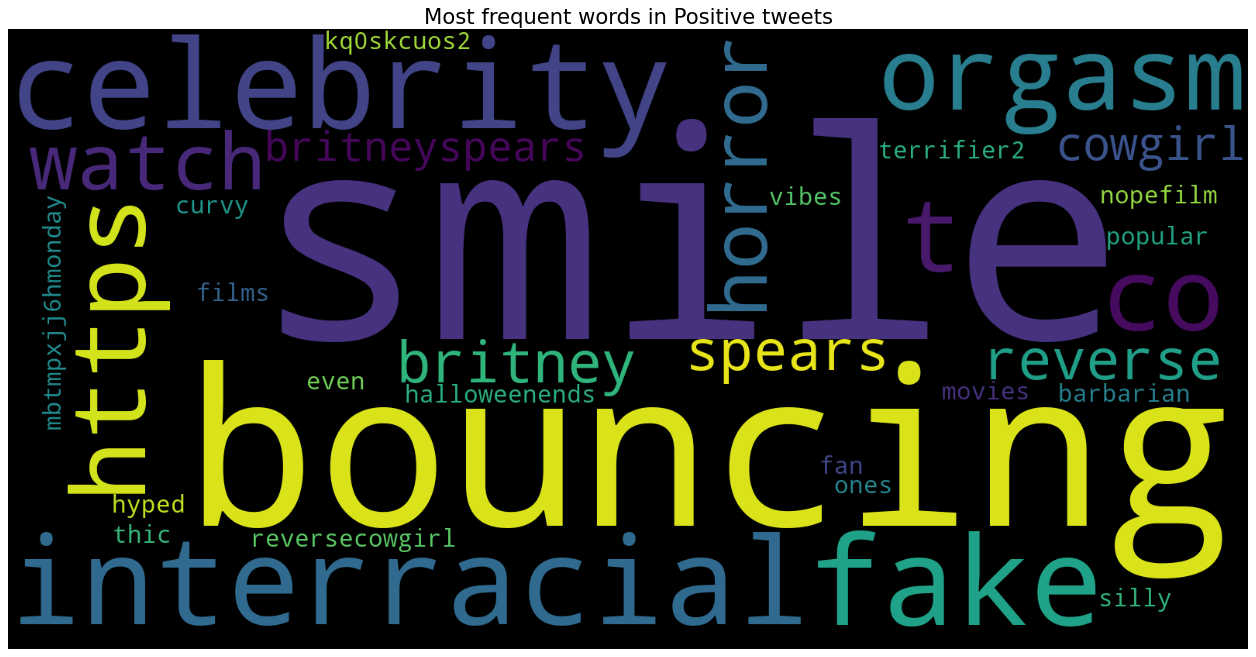

In [784]:
#display wordcloud of positive sentiment
text =''.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,25),facecolor= 'None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive tweets', fontsize=19)
plt.show()

In [785]:
#sort out negative sentiment
neg_tweets = text_df[text_df.sentiment == 'negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending = False)
neg_tweets.head()

,text,polarity,sentiment,compound,neg,neu,pos
12,orcs better run back ruzzia . gon na absolutel...,-0.008333,negative,-0.9170,0.338,0.554,0.108
13,"@ mattia_n left : vika , killed ir regime dron...",-0.028571,negative,-0.9601,0.294,0.706,0.000
2,@ thehilltimes dumbest headline ever . putin w...,-0.082576,negative,-0.6293,0.208,0.705,0.087
6,@ iaponomarenko @ kathid_d crazy # fn # russia...,-0.100000,negative,-0.8807,0.238,0.658,0.104
44,"43 graves already found liberated liman , bodi...",-0.100000,negative,-0.2960,0.087,0.913,0.000


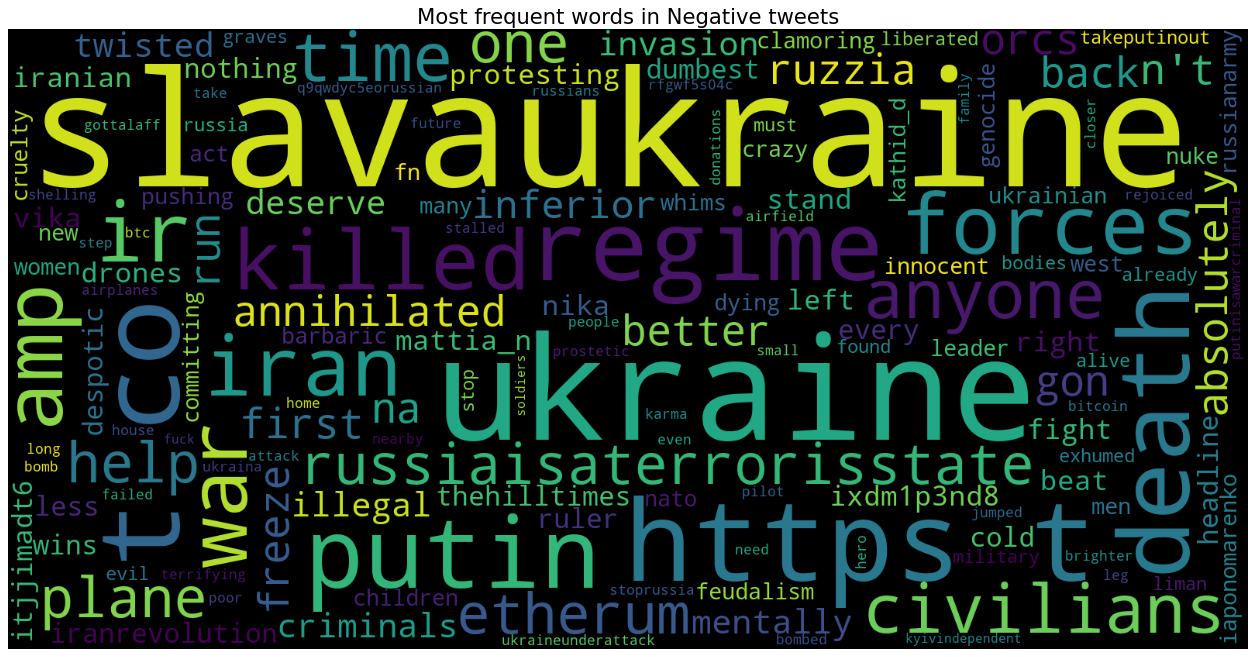

In [786]:
#display negative sentiment wordcloud
text =''.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,25),facecolor= 'None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative tweets', fontsize=19)
plt.show()

In [814]:
#sort out neutral sentiment
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending = False)
neutral_tweets.head()

,text,polarity,sentiment,compound,neg,neu,pos
0,@ kusuwa @ ukraine @ bandaagency need prayers ...,0.0,Neutral,0.9274,0.0,0.541,0.459
1,@ alicjawinnicki @ secblinken thank support pr...,0.0,Neutral,0.9274,0.0,0.469,0.531
42,bought next fav hoodie winter ’ coming ! thank...,0.0,Neutral,0.8829,0.0,0.636,0.364
41,@ grntmedia women pows released # slavaukraine,0.0,Neutral,0.0000,0.0,1.000,0.000
39,ukraine independent ! # slavaukraine🇺🇦 https :...,0.0,Neutral,0.0000,0.0,1.000,0.000


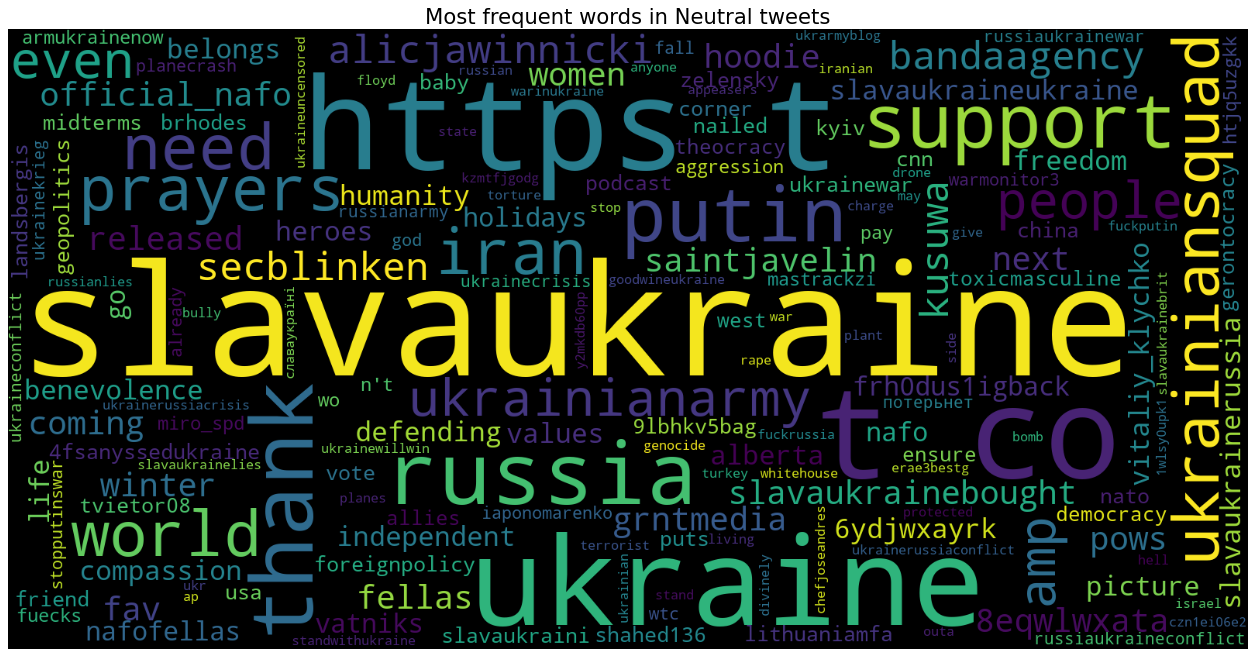

In [788]:
#display wordcloud of neurtral sentiment 
text =''.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,25),facecolor= 'None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Neutral tweets', fontsize=19)
plt.show()

In [789]:
#All blocks below are testing points for accuracy within the processing 
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [790]:
feature_names = vect.get_feature_names()
print("Number of features:{}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features:1036

First 20 features:
 ['01', '01 bitcoin', '152', '152 civilians', '1wlsy0upk1', '35', '35 military', '43', '43 graves', '4fsanyssed', '6ydjwxayrk', '8eqwlwxata', '9lbhkv5bag', 'a4jcrelslj', 'abc', 'abc every', 'absolute', 'absolute heroes', 'absolutely', 'absolutely annihilated']


In [791]:
x = text_df['text']
y = text_df['sentiment']
x = vect.transform(x)

In [792]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [793]:
print("size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

size of x_train: (38, 1036)
Size of y_train: (38,)
Size of x_test: (10, 1036)
Size of y_test: (10,)


In [794]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 40.00%


In [795]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred ))

[[4 0 1]
 [3 0 0]
 [2 0 0]]


              precision    recall  f1-score   support

     Neutral       0.44      0.80      0.57         5
    negative       0.00      0.00      0.00         3
    positive       0.00      0.00      0.00         2

    accuracy                           0.40        10
   macro avg       0.15      0.27      0.19        10
weighted avg       0.22      0.40      0.29        10



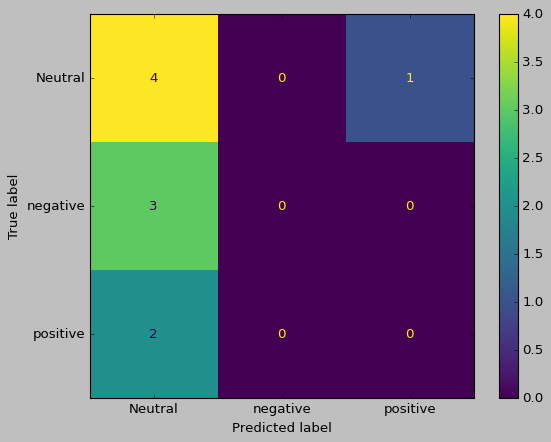

In [796]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [797]:
param_grid={'C':[0.001, 0.01, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10]})

In [798]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 0.001}


In [799]:
y_pred = grid.predict(x_test)

In [800]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 50.00%


In [801]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred ))

[[4 0 1]
 [3 0 0]
 [2 0 0]]


              precision    recall  f1-score   support

     Neutral       0.44      0.80      0.57         5
    negative       0.00      0.00      0.00         3
    positive       0.00      0.00      0.00         2

    accuracy                           0.40        10
   macro avg       0.15      0.27      0.19        10
weighted avg       0.22      0.40      0.29        10



In [802]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [803]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 40.00%


In [804]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[4 0 1]
 [3 0 0]
 [2 0 0]]


              precision    recall  f1-score   support

     Neutral       0.44      0.80      0.57         5
    negative       0.00      0.00      0.00         3
    positive       0.00      0.00      0.00         2

    accuracy                           0.40        10
   macro avg       0.15      0.27      0.19        10
weighted avg       0.22      0.40      0.29        10



In [805]:
grid = { 'C':[0.01, 0.1, 1, 10],'kernel':["linear", "poly","rbf","sigmoid"], 'degree':[1,3,5,7], 'gamma':[0.01,1]}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 1, 10]})

In [806]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 0.01}


In [807]:
y_pred = grid.predict(x_test)

In [808]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy:{:.2f}%".format(logreg_acc*100))

Test accuracy:40.00%


In [809]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[4 0 1]
 [3 0 0]
 [2 0 0]]


              precision    recall  f1-score   support

     Neutral       0.44      0.80      0.57         5
    negative       0.00      0.00      0.00         3
    positive       0.00      0.00      0.00         2

    accuracy                           0.40        10
   macro avg       0.15      0.27      0.19        10
weighted avg       0.22      0.40      0.29        10



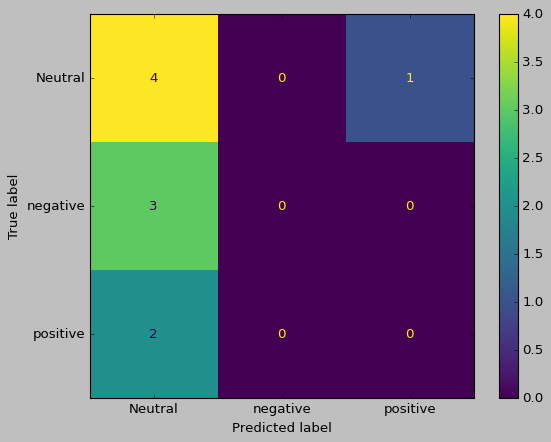

In [810]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()